In [14]:
import pandas as pd
from collections import defaultdict
import numpy as np
import subprocess

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
classes_df = pd.read_csv("./configs/_base_/class_mapping/universal_classes.csv", sep=";")
CLASSES= {}
for key, value in zip(classes_df["class_id"], classes_df["class_name"]):
    CLASSES[key] = value

In [4]:
print(CLASSES)

{0: 'ignore', 1: 'car', 2: 'bicycle', 3: 'bus', 4: 'truck', 5: 'train', 6: 'caravan', 7: 'trailer', 8: 'motorcycle', 9: 'ego_vehicle', 10: 'wheeled_slow', 11: 'boat', 12: 'other-vehicles', 13: 'road', 14: 'sidewalk', 15: 'parking', 16: 'rail_track', 17: 'pedestrian_area', 18: 'crosswalk_plain', 19: 'bike_lane', 20: 'service_lane', 21: 'curb', 22: 'general_marking', 23: 'zebra_marking', 24: 'snow', 25: 'water', 26: 'sand', 27: 'building', 28: 'fence', 29: 'wall', 30: 'bridge', 31: 'tunnel', 32: 'guard_rail', 33: 'barrier', 34: 'vegetation', 35: 'terrain', 36: 'sky', 37: 'mountain', 38: 'pole', 39: 'utility_pole', 40: 'traffic_sign', 41: 'traffic_light', 42: 'street_light', 43: 'billboard', 44: 'manhole', 45: 'banner', 46: 'trash_can', 47: 'catch_basin', 48: 'junction_box', 49: 'cctv_camera', 50: 'fire_hydrant', 51: 'bench', 52: 'mailbox', 53: 'pothole', 54: 'phone_booth', 55: 'traffic_sign_frame', 56: 'person', 57: 'motorcyclist', 58: 'bicyclist', 59: 'other_rider', 60: 'animal', 61: 'b

In [21]:
IGNORE_CLASSES_INDX = [0]

ALL_CLASSES_INDX = list(range(1, 191))

In [22]:
print(ALL_CLASSES_INDX)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190]


In [6]:
ROAD_CLASSES_INDX = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                     13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                     25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                     41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                     57, 58, 59, 60, 61, 180, 181, 182, 185, 189, 190]

In [7]:
INDOOR_CLASSES_INDX = [62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
                       83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
                       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
                       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
                       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
                       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
                      183, 186, 187, 188]

### Balanced Clustering 
source: https://github.com/zhu-he/regularized-k-means

In [6]:
feat_mean_df = pd.read_csv("features_out/feat_3000.csv", sep=";")

In [7]:
print(list(feat_mean_df.columns))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

### On all classes

In [8]:
feat_mean_df.head()

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0.000006,0.000344,-0.000889,0.000659,0.000937,0.002195,-0.001197,-0.002208,0.000488,0.000258,...,0.001670,-0.000448,0.000404,0.000963,-0.000380,0.000270,-0.001042,0.002517,0.000869,0.003162
1,0.000025,0.000378,-0.000191,0.000858,0.001146,0.001260,0.009621,-0.003944,0.000053,0.000271,...,0.001428,-0.000229,0.000257,0.001114,-0.000860,-0.001472,-0.000504,0.002423,0.000887,0.004317
2,0.000012,0.000499,-0.000457,0.000456,0.000965,0.002849,0.006463,-0.002799,0.000141,0.000372,...,0.001399,0.000129,0.000203,0.000902,0.000979,-0.013227,-0.000916,0.000633,0.000610,0.003155
3,0.000039,0.000419,0.000277,0.000532,0.001065,0.002478,-0.003187,-0.001614,0.000736,0.000403,...,0.000844,0.000639,0.000516,0.000887,0.000071,-0.006240,-0.000988,0.001152,0.000507,0.003304
4,0.000017,0.000494,-0.001014,0.000442,0.001083,0.002357,-0.007425,0.000287,0.000174,0.000413,...,0.001733,0.000297,0.000402,0.001275,-0.001531,-0.000562,-0.001155,0.001389,0.000713,0.005168


In [9]:
feat_df = feat_mean_df.T

In [10]:
feat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000006,0.000025,0.000012,0.000039,0.000017,0.000056,0.000056,0.000058,0.000050,0.000070,...,0.000094,0.000094,0.000111,0.000092,0.000099,0.000048,0.000087,0.000061,0.000070,0.000067
1,0.000344,0.000378,0.000499,0.000419,0.000494,0.000553,0.000554,0.000555,0.000578,0.000516,...,0.000513,0.000510,0.000496,0.000457,0.000560,0.000367,0.000474,0.000451,0.000508,0.000367
2,-0.000889,-0.000191,-0.000457,0.000277,-0.001014,-0.000997,-0.000780,-0.000748,-0.000321,-0.001161,...,0.003665,0.002770,0.002742,0.002006,0.001762,0.002342,0.001264,0.001024,0.000196,0.000092
3,0.000659,0.000858,0.000456,0.000532,0.000442,0.000620,0.000360,0.000809,0.000576,0.000622,...,0.000572,0.000723,0.000710,0.001031,0.000551,0.000636,0.000762,0.000704,0.000443,0.000421
4,0.000937,0.001146,0.000965,0.001065,0.001083,0.001052,0.001134,0.001098,0.000723,0.001128,...,0.001129,0.001060,0.000780,0.000945,0.000759,0.000569,0.000371,0.000903,0.000869,0.000826


In [11]:
feat_df.to_csv("features_out/all_3000.csv", index=False)

In [12]:
pd.read_csv("features_out/all_3000.csv")

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.000006,0.000025,0.000012,0.000039,0.000017,0.000056,0.000056,0.000058,0.000050,0.000070,...,0.000094,0.000094,0.000111,0.000092,0.000099,0.000048,0.000087,0.000061,0.000070,0.000067
1,0.000344,0.000378,0.000499,0.000419,0.000494,0.000553,0.000554,0.000555,0.000578,0.000516,...,0.000513,0.000510,0.000496,0.000457,0.000560,0.000367,0.000474,0.000451,0.000508,0.000367
2,-0.000889,-0.000191,-0.000457,0.000277,-0.001014,-0.000997,-0.000780,-0.000748,-0.000321,-0.001161,...,0.003665,0.002770,0.002742,0.002006,0.001762,0.002342,0.001264,0.001024,0.000196,0.000092
3,0.000659,0.000858,0.000456,0.000532,0.000442,0.000620,0.000360,0.000809,0.000576,0.000622,...,0.000572,0.000723,0.000710,0.001031,0.000551,0.000636,0.000762,0.000704,0.000443,0.000421
4,0.000937,0.001146,0.000965,0.001065,0.001083,0.001052,0.001134,0.001098,0.000723,0.001128,...,0.001129,0.001060,0.000780,0.000945,0.000759,0.000569,0.000371,0.000903,0.000869,0.000826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.000270,-0.001472,-0.013227,-0.006240,-0.000562,-0.005085,0.000734,-0.001534,0.003662,0.002332,...,-0.003660,-0.009557,-0.007119,-0.008409,0.003082,-0.000890,-0.001873,-0.009596,0.002175,-0.006705
187,-0.001042,-0.000504,-0.000916,-0.000988,-0.001155,-0.000402,-0.000146,-0.000668,-0.001303,-0.000870,...,-0.000745,-0.000572,-0.000159,-0.000522,-0.000101,-0.000295,-0.000185,-0.000338,-0.000700,-0.000248
188,0.002517,0.002423,0.000633,0.001152,0.001389,0.000392,-0.001066,0.000577,0.000254,0.000147,...,0.001271,0.000926,0.000696,-0.000415,0.000816,-0.000402,0.000193,0.001424,0.001344,0.002568
189,0.000869,0.000887,0.000610,0.000507,0.000713,0.000550,0.000873,0.001053,0.000329,0.000367,...,0.002087,0.002394,0.001838,0.001896,0.001151,0.001775,0.001895,0.001602,0.001835,0.001369


In [15]:
bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "features_out/all_3000.csv" 7 -s42 -r 1 -l 0.0005 -a "auto_clusters/level1_out" -o "cluster_out/level1_logs.txt"'
process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
output, error = process.communicate(timeout=None)

Sum of Squares: 5.35359e+06
Used Time: 0.00377133


In [16]:
l1_label_df = pd.read_csv("auto_clusters/level1_out.csv", sep=";")
l1_label = l1_label_df.to_numpy().reshape(-1).tolist()
print(l1_label)

[0, 6, 5, 3, 4, 2, 1, 3, 3, 6, 1, 5, 3, 0, 6, 3, 5, 1, 4, 4, 5, 4, 3, 3, 3, 0, 1, 6, 4, 6, 3, 6, 5, 5, 6, 5, 6, 0, 5, 5, 3, 1, 1, 6, 2, 0, 2, 1, 4, 1, 1, 1, 2, 4, 5, 1, 5, 5, 5, 2, 3, 1, 0, 0, 0, 6, 6, 6, 0, 6, 6, 4, 6, 0, 5, 0, 5, 0, 6, 4, 4, 6, 3, 2, 4, 6, 2, 3, 0, 3, 5, 3, 0, 3, 1, 4, 3, 5, 1, 0, 0, 6, 4, 2, 6, 3, 4, 4, 0, 6, 3, 6, 0, 4, 3, 2, 3, 6, 5, 5, 5, 5, 2, 1, 2, 2, 2, 4, 0, 2, 2, 1, 0, 0, 2, 4, 2, 0, 5, 2, 3, 0, 2, 1, 1, 3, 4, 2, 3, 4, 1, 1, 2, 5, 6, 1, 2, 3, 0, 0, 4, 1, 5, 4, 2, 5, 1, 2, 2, 0, 4, 5, 4, 1, 1, 4, 2, 0, 6, 4, 3, 3, 6, 6, 6, 1, 4, 0, 3, 5, 1]


In [23]:
groups_w_name = defaultdict(list)
groups_w_id = defaultdict(list)
for class_id, label_id in zip(ALL_CLASSES_INDX, l1_label):
    groups_w_name[label_id].append(CLASSES[int(class_id)])
    groups_w_id[label_id].append(int(class_id))

In [24]:
groups_w_name

defaultdict(list,
            {0: ['car',
              'sidewalk',
              'sand',
              'pole',
              'trash_can',
              'ceiling',
              'bed',
              'window',
              'curtain',
              'House',
              'mirror',
              'Field',
              'Column',
              'skyscraper',
              'Case-showcase',
              'Pool-billiard',
              'toilet',
              'countertop',
              'apparel',
              'buffet',
              'poster',
              'canopy',
              'stool',
              'screen-projector',
              'blanket-cover',
              'monitor',
              'Shower curtain',
              'Soil-ground'],
             6: ['bicycle',
              'wheeled_slow',
              'parking',
              'fence',
              'bridge',
              'guard_rail',
              'terrain',
              'mountain',
              'manhole',
              'cabinet',

In [27]:
print(groups_w_id)

defaultdict(<class 'list'>, {0: [1, 14, 26, 38, 46, 63, 64, 65, 69, 74, 76, 78, 89, 93, 100, 101, 109, 113, 129, 133, 134, 138, 142, 159, 160, 170, 178, 188], 6: [2, 10, 15, 28, 30, 32, 35, 37, 44, 66, 67, 68, 70, 71, 73, 79, 82, 86, 102, 105, 110, 112, 118, 155, 179, 183, 184, 185], 5: [3, 12, 17, 21, 33, 34, 36, 39, 40, 55, 57, 58, 59, 75, 77, 91, 98, 119, 120, 121, 122, 139, 154, 163, 166, 172, 190], 3: [4, 8, 9, 13, 16, 23, 24, 25, 31, 41, 61, 83, 88, 90, 92, 94, 97, 106, 111, 115, 117, 141, 146, 149, 158, 181, 182, 189], 4: [5, 19, 20, 22, 29, 49, 54, 72, 80, 81, 85, 96, 103, 107, 108, 114, 128, 136, 147, 150, 161, 164, 171, 173, 176, 180, 187], 2: [6, 45, 47, 53, 60, 84, 87, 104, 116, 123, 125, 126, 127, 130, 131, 135, 137, 140, 143, 148, 153, 157, 165, 168, 169, 177], 1: [7, 11, 18, 27, 42, 43, 48, 50, 51, 52, 56, 62, 95, 99, 124, 132, 144, 145, 151, 152, 156, 162, 167, 174, 175, 186]})


In [29]:
print(groups_w_id.keys())

dict_keys([0, 6, 5, 3, 4, 2, 1])


In [ ]:
groups_w_name_l2 = dict()
groups_w_id_l2 = dict()

#### level2

In [ ]:
# level 2 head id
l2_head_key = 6
groups_w_id_0 = [str(i) for i in sorted(groups_w_id[l2_head_key])]
LEVEL2_0_INDX = groups_w_id[l2_head_key]
print(LEVEL2_0_INDX)


In [ ]:
len(LEVEL2_0_INDX)

In [ ]:
all_df_l2_0 = feat_mean_df[groups_w_id_0]

In [ ]:
all_df_l2_0 = all_df_l2_0.T

In [ ]:
all_df_l2_0

In [ ]:
all_df_l2_0.to_csv("features_out/all_3000_l2_0.csv", index=False)
pd.read_csv("features_out/all_3000_l2_0.csv")

In [ ]:
clusters = [4, 2, 2, 4, 3, 2, 6]
curr_clusters = clusters[l2_head_key]
bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "features_out/all_3000_l2_0.csv" {curr_clusters} -s42 -r 1 -l 0.0005 -a "auto_clusters/level2_0_out" -o "auto_clusters/level2_0_logs.txt"'
process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
output, error = process.communicate(timeout=None)


In [ ]:

l2_0_label_df = pd.read_csv("auto_clusters/level2_0_out.csv")
l2_0_label = l2_0_label_df.to_numpy().reshape(-1).tolist()
groups_w_name_l2_0 = defaultdict(list)
groups_w_id_l2_0 = defaultdict(list)
for class_id, label_id in zip(LEVEL2_0_INDX, l2_0_label):
    groups_w_name_l2_0[label_id].append(CLASSES[int(class_id)])
    groups_w_id_l2_0[label_id].append(int(class_id))
    

groups_w_name_l2[l2_head_key] = groups_w_name_l2_0
groups_w_id_l2[l2_head_key] = groups_w_id_l2_0

In [ ]:
groups_w_name_l2.keys()

In [ ]:
groups_w_name_l2

In [ ]:
groups_w_id_l2

In [178]:
all_df_l2_0.to_csv("features_out/all_3000_l2_0.csv", index=False)
pd.read_csv("features_out/all_3000_l2_0.csv")

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.000889,-0.000191,-0.000457,0.000277,-0.001014,-0.000997,-0.000780,-0.000748,-0.000321,-0.001161,...,0.003665,0.002770,0.002742,0.002006,0.001762,0.002342,0.001264,0.001024,0.000196,0.000092
1,0.000126,0.012800,-0.005594,0.016599,0.001023,-0.001070,-0.014433,0.001815,-0.008502,-0.011783,...,0.007596,0.010194,0.014858,0.005844,0.000091,-0.001140,-0.008190,-0.013386,-0.021292,-0.004614
2,-0.001141,-0.001400,-0.001303,-0.000497,0.000114,0.001343,0.000822,0.001160,0.001137,0.000167,...,0.000521,0.000262,0.000190,0.000602,0.000231,-0.000318,-0.000340,0.000495,-0.000129,-0.000308
3,0.000159,0.000212,0.000343,0.000115,0.000022,0.000024,0.000481,0.000364,0.000382,0.000789,...,0.001058,0.001160,0.000813,0.000852,0.000775,0.000849,0.000700,0.000629,0.000323,0.000478
4,0.001097,0.001279,0.001112,0.000816,0.000697,0.001026,0.000872,0.000453,0.000266,0.000433,...,0.001295,0.001455,0.001219,0.000625,0.001111,0.001246,0.001253,0.001134,0.001170,0.001043
5,-0.000551,-0.000379,-0.000749,0.000911,-0.000519,-0.000177,0.000433,-0.000922,-0.000948,-0.000516,...,0.001401,0.002583,0.003575,0.001777,0.001738,0.001720,0.000860,0.000779,0.001048,0.001021
6,-0.000130,-0.000033,0.000133,-0.000042,0.000014,-0.000037,0.000245,0.000385,0.000059,0.000091,...,0.000649,0.000638,0.000450,0.000573,0.000404,0.000416,0.000205,0.000033,-0.000079,-0.000094
7,-0.000123,-0.000181,0.000267,0.000209,0.000441,0.000715,0.000008,0.000443,0.000379,0.000309,...,0.000550,0.000502,0.000349,0.000338,0.000301,0.000015,0.000295,0.000229,0.000642,-0.000207
8,0.002020,0.003360,0.002904,0.000348,-0.001143,-0.002549,0.000152,-0.000643,-0.001200,-0.003395,...,0.008096,0.008614,0.004681,0.006433,0.007161,0.011615,0.007047,0.006113,0.008727,0.007246
9,0.000837,0.000755,0.000694,0.000735,0.000830,0.000741,0.000806,0.000797,0.000906,0.000737,...,0.000568,0.000564,0.000670,0.000617,0.000635,0.000633,0.000652,0.000753,0.000842,0.001050


In [179]:
clusters = [4, 2, 2, 4, 3, 2, 6]
curr_clusters = clusters[l2_head_key]
bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "features_out/all_3000_l2_0.csv" {curr_clusters} -s42 -r 1 -l 0.0005 -a "auto_clusters/level2_0_out" -o "auto_clusters/level2_0_logs.txt"'
process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
output, error = process.communicate(timeout=None)


Sum of Squares: 4.16965e+06
Used Time: 0.000443406


In [180]:

l2_0_label_df = pd.read_csv("auto_clusters/level2_0_out.csv")
l2_0_label = l2_0_label_df.to_numpy().reshape(-1).tolist()
groups_w_name_l2_0 = defaultdict(list)
groups_w_id_l2_0 = defaultdict(list)
for class_id, label_id in zip(LEVEL2_0_INDX, l2_0_label):
    groups_w_name_l2_0[label_id].append(CLASSES[int(class_id)])
    groups_w_id_l2_0[label_id].append(int(class_id))
    

groups_w_name_l2[l2_head_key] = groups_w_name_l2_0
groups_w_id_l2[l2_head_key] = groups_w_id_l2_0

In [181]:
groups_w_name_l2.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [182]:
groups_w_name_l2

{0: defaultdict(list,
             {2: ['car',
               'House',
               'mirror',
               'Field',
               'skyscraper',
               'toilet',
               'countertop',
               'monitor'],
              3: ['sidewalk',
               'pole',
               'bed',
               'window',
               'Pool-billiard',
               'buffet',
               'canopy'],
              0: ['sand',
               'ceiling',
               'curtain',
               'Case-showcase',
               'screen-projector',
               'blanket-cover',
               'Shower curtain'],
              1: ['trash_can',
               'Column',
               'apparel',
               'poster',
               'stool',
               'Soil-ground']}),
 1: defaultdict(list,
             {0: ['trailer',
               'boat',
               'building',
               'junction_box',
               'fire_hydrant',
               'bench',
               'person',


In [184]:
groups_w_id_l2

{0: defaultdict(list,
             {2: [1, 74, 76, 78, 93, 109, 113, 170],
              3: [14, 38, 64, 65, 101, 133, 138],
              0: [26, 63, 69, 100, 159, 160, 178],
              1: [46, 89, 129, 134, 142, 188]}),
 1: defaultdict(list,
             {0: [7, 11, 27, 48, 50, 51, 56, 62, 99, 132, 144, 151, 162, 175],
              1: [18, 42, 43, 52, 95, 124, 145, 152, 156, 167, 174, 186]}),
 2: defaultdict(list,
             {0: [6, 45, 47, 125, 126, 127, 130, 135, 140, 148, 157, 168],
              1: [53,
               60,
               84,
               87,
               104,
               116,
               123,
               131,
               137,
               143,
               153,
               165,
               169,
               177]}),
 3: defaultdict(list,
             {2: [4, 8, 13, 31, 111, 117, 146, 182],
              3: [9, 16, 61, 88, 90, 94, 189],
              1: [23, 24, 41, 83, 115, 181],
              0: [25, 92, 97, 106, 141, 149, 158]}),

### On ROAD CLASSES

In [10]:
ROAD_CLASSES_INDX = [str(i) for i in ROAD_CLASSES_INDX]

In [11]:
print(ROAD_CLASSES_INDX)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '180', '181', '182', '185', '189', '190']


In [12]:
road_df = feat_mean_df[ROAD_CLASSES_INDX]

In [13]:
road_df.head()

,1,2,3,4,5,6,7,8,9,10,...,58,59,60,61,180,181,182,185,189,190
0,0.002484,0.004438,0.001830,0.000671,0.003147,0.006319,0.007599,0.002064,0.003738,0.002099,...,0.007763,0.002048,0.018791,-0.008591,0.004853,0.001491,-0.000838,0.000580,0.002500,-0.002413
1,0.002523,0.003804,0.001737,0.000431,0.003518,0.005769,0.007693,0.001182,0.003704,0.000789,...,0.006787,-0.001612,0.023205,-0.010223,0.003527,0.002618,-0.000910,0.000036,0.002455,-0.003453
2,0.002455,0.003612,0.002419,0.000852,0.002086,0.009332,0.008003,0.001703,0.003543,-0.002409,...,0.004804,-0.005599,-0.013676,-0.012914,0.003537,0.003503,-0.002628,-0.000973,0.002933,-0.003217
3,0.002424,0.003851,0.002008,0.000772,0.003081,-0.007551,0.007861,0.002290,0.003570,-0.003599,...,0.005745,0.000757,0.015214,0.000388,0.002810,0.003577,-0.002440,-0.000378,0.002797,-0.004118
4,0.002392,0.002816,0.001822,0.000635,0.003697,-0.005740,0.006102,0.002687,0.003415,0.000861,...,0.003397,-0.013406,-0.006675,0.002853,0.002911,0.003679,-0.002075,0.000151,0.002733,-0.002367


In [14]:
road_df = road_df.T

In [15]:
road_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
1,0.002484,0.002523,0.002455,0.002424,0.002392,0.002430,0.002357,0.002379,0.002400,0.002391,...,0.002542,0.002563,0.002625,0.002579,0.002518,0.002581,0.002595,0.002589,0.002561,0.002633
2,0.004438,0.003804,0.003612,0.003851,0.002816,0.002934,0.004116,0.002936,0.002987,0.002978,...,0.002745,0.002561,0.003298,0.002304,0.003242,0.002739,0.003100,0.002787,0.003500,0.004939
3,0.001830,0.001737,0.002419,0.002008,0.001822,0.001952,0.001788,0.001861,0.001884,0.002024,...,0.002333,0.002372,0.002663,0.002449,0.002469,0.001945,0.002217,0.002074,0.002478,0.002662
4,0.000671,0.000431,0.000852,0.000772,0.000635,0.000581,0.000913,0.000965,0.001194,0.001606,...,0.001873,0.001870,0.002080,0.001837,0.001866,0.001519,0.001476,0.001607,0.001974,0.001500
5,0.003147,0.003518,0.002086,0.003081,0.003697,0.003132,0.004548,0.004027,0.003972,0.004250,...,0.004008,0.003341,0.003443,0.004402,0.002659,0.002235,0.002848,0.003896,0.003319,0.003758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.001491,0.002618,0.003503,0.003577,0.003679,0.004203,0.004101,0.003622,0.003116,0.003803,...,0.003017,0.003912,0.004558,0.003068,0.002747,0.002152,0.002143,0.001419,0.002536,0.002051
182,-0.000838,-0.000910,-0.002628,-0.002440,-0.002075,-0.003328,-0.002184,-0.001704,-0.001462,-0.000913,...,0.000860,0.000302,-0.000250,0.000049,0.000738,-0.000381,-0.001611,-0.000338,0.001146,0.000723
185,0.000580,0.000036,-0.000973,-0.000378,0.000151,-0.000686,-0.002989,-0.000472,0.002239,-0.000258,...,0.004627,0.003067,0.001269,0.003903,0.002855,0.002576,0.002972,0.004545,0.004851,0.007964
189,0.002500,0.002455,0.002933,0.002797,0.002733,0.002978,0.002876,0.002672,0.002818,0.002617,...,0.002890,0.002860,0.002845,0.002972,0.002784,0.002528,0.002821,0.002424,0.003155,0.003052


In [16]:
road_df.to_csv("features_out/road_1000.csv", index=False)

In [17]:
pd.read_csv("features_out/road_1000.csv")

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.002484,0.002523,0.002455,0.002424,0.002392,0.002430,0.002357,0.002379,0.002400,0.002391,...,0.002542,0.002563,0.002625,0.002579,0.002518,0.002581,0.002595,0.002589,0.002561,0.002633
1,0.004438,0.003804,0.003612,0.003851,0.002816,0.002934,0.004116,0.002936,0.002987,0.002978,...,0.002745,0.002561,0.003298,0.002304,0.003242,0.002739,0.003100,0.002787,0.003500,0.004939
2,0.001830,0.001737,0.002419,0.002008,0.001822,0.001952,0.001788,0.001861,0.001884,0.002024,...,0.002333,0.002372,0.002663,0.002449,0.002469,0.001945,0.002217,0.002074,0.002478,0.002662
3,0.000671,0.000431,0.000852,0.000772,0.000635,0.000581,0.000913,0.000965,0.001194,0.001606,...,0.001873,0.001870,0.002080,0.001837,0.001866,0.001519,0.001476,0.001607,0.001974,0.001500
4,0.003147,0.003518,0.002086,0.003081,0.003697,0.003132,0.004548,0.004027,0.003972,0.004250,...,0.004008,0.003341,0.003443,0.004402,0.002659,0.002235,0.002848,0.003896,0.003319,0.003758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.001491,0.002618,0.003503,0.003577,0.003679,0.004203,0.004101,0.003622,0.003116,0.003803,...,0.003017,0.003912,0.004558,0.003068,0.002747,0.002152,0.002143,0.001419,0.002536,0.002051
63,-0.000838,-0.000910,-0.002628,-0.002440,-0.002075,-0.003328,-0.002184,-0.001704,-0.001462,-0.000913,...,0.000860,0.000302,-0.000250,0.000049,0.000738,-0.000381,-0.001611,-0.000338,0.001146,0.000723
64,0.000580,0.000036,-0.000973,-0.000378,0.000151,-0.000686,-0.002989,-0.000472,0.002239,-0.000258,...,0.004627,0.003067,0.001269,0.003903,0.002855,0.002576,0.002972,0.004545,0.004851,0.007964
65,0.002500,0.002455,0.002933,0.002797,0.002733,0.002978,0.002876,0.002672,0.002818,0.002617,...,0.002890,0.002860,0.002845,0.002972,0.002784,0.002528,0.002821,0.002424,0.003155,0.003052


Sum of Squares: 0.904922
Used Time: 0.000534125
Sum of Squares: 0.876083
Used Time: 0.000505412
Sum of Squares: 0.852812
Used Time: 0.000739713
Sum of Squares: 0.839898
Used Time: 0.00108675
Sum of Squares: 0.787567
Used Time: 0.00106216
Sum of Squares: 0.769458
Used Time: 0.00120171
Sum of Squares: 0.760481
Used Time: 0.00126852
Sum of Squares: 0.723387
Used Time: 0.00154949
Sum of Squares: 0.721231
Used Time: 0.00156695
Sum of Squares: 0.541087
Used Time: 0.0013359
Sum of Squares: 0.49241
Used Time: 0.00204077
Sum of Squares: 0.470555
Used Time: 0.00243361
Sum of Squares: 0.560677
Used Time: 0.00168741


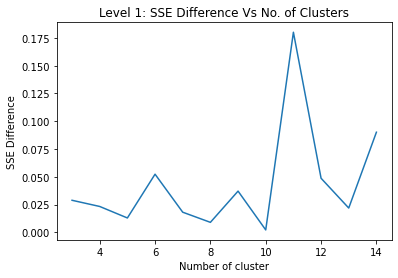

{2: '0.904922', 3: '0.876083', 4: '0.852812', 5: '0.839898', 6: '0.787567', 7: '0.769458', 8: '0.760481', 9: '0.723387', 10: '0.721231', 11: '0.541087', 12: '0.49241', 13: '0.470555', 14: '0.560677'}


In [35]:
import subprocess

sse = {}
for ei, k in enumerate(range(2, 15)):
    bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "soft" "features_out/road_1000.csv" {k} -s42 -r 1 -l 0.005 -a "cluster_out/out.csv" -o "cluster_out/logs.txt"'
    process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
    output, error = process.communicate(timeout=None)
    with open("cluster_out/logs.txt", "r") as f:
        sse_value = f.readlines()[-1].split(",")[-2]
    sse[k] = sse_value 
    bashCommand = f'rm "cluster_out/logs.txt"'
    process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )


sse_values = [float(i) for i in sse.values()]
sse_diff_values = np.absolute(np.array(sse_values[1:]) - np.array(sse_values[:-1])).tolist()
sse_diff_values =  sse_diff_values

plt.figure()
plt.title("Level 1: SSE Difference Vs No. of Clusters")
plt.plot(list(sse.keys())[1:], sse_diff_values)
plt.xlabel("Number of cluster")
plt.ylabel("SSE Difference")
plt.show()
print(sse)

#### Level 1 with Cluster : 4

In [42]:
bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "features_out/road_1000.csv" 4 -s42 -r 1 -l 0.0005 -a "cluster_out/level1_out" -o "cluster_out/level1_logs.txt"'
process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
output, error = process.communicate(timeout=None)

Sum of Squares: 5.23241e+06
Used Time: 0.000783879


In [43]:
l1_label_df = pd.read_csv("cluster_out/level1_out.csv", sep=";")


In [44]:
l1_label = l1_label_df.to_numpy().reshape(-1).tolist()

In [45]:
print(l1_label)

[3, 0, 0, 0, 3, 0, 3, 2, 1, 1, 1, 1, 3, 3, 2, 1, 0, 1, 3, 1, 0, 3, 3, 1, 1, 1, 3, 0, 3, 3, 0, 2, 1, 3, 3, 3, 3, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 3, 2, 1, 0, 0, 2, 1, 2, 1, 0, 3, 2, 0, 2, 2, 2, 2]


In [46]:
groups_w_name = defaultdict(list)
groups_w_id = defaultdict(list)
for class_id, label_id in zip(ROAD_CLASSES_INDX, l1_label):
    groups_w_name[label_id].append(CLASSES[int(class_id)])
    groups_w_id[label_id].append(int(class_id))

### Level 1 clusters

In [47]:
groups_w_name

defaultdict(list,
            {3: ['car',
              'train',
              'trailer',
              'road',
              'sidewalk',
              'bike_lane',
              'general_marking',
              'zebra_marking',
              'building',
              'wall',
              'bridge',
              'vegetation',
              'terrain',
              'sky',
              'mountain',
              'bench',
              'bike_rack'],
             0: ['bicycle',
              'bus',
              'truck',
              'caravan',
              'pedestrian_area',
              'curb',
              'fence',
              'tunnel',
              'pole',
              'utility_pole',
              'billboard',
              'manhole',
              'junction_box',
              'phone_booth',
              'traffic_sign_frame',
              'animal',
              'pickup_truck'],
             2: ['motorcycle',
              'parking',
              'guard_rail',
           

In [48]:
print(groups_w_id)

defaultdict(<class 'list'>, {3: [1, 5, 7, 13, 14, 19, 22, 23, 27, 29, 30, 34, 35, 36, 37, 51, 61], 0: [2, 3, 4, 6, 17, 21, 28, 31, 38, 39, 43, 44, 48, 54, 55, 60, 181], 2: [8, 15, 32, 40, 41, 42, 45, 46, 49, 52, 56, 58, 180, 182, 185, 189, 190], 1: [9, 10, 11, 12, 16, 18, 20, 24, 25, 26, 33, 47, 50, 53, 57, 59]})


#### Level 2_i

In [49]:
groups_w_name_l2 = dict()

In [ ]:
# # level 2 head id
# l2_head_key = 3
# groups_w_id_0 = [str(i) for i in sorted(groups_w_id[l2_head_key])]
# LEVEL2_0_INDX = groups_w_id[l2_head_key]
# print(LEVEL2_0_INDX)
# len(LEVEL2_0_INDX)
# road_df_l2_0 = feat_mean_df[groups_w_id_0]
# road_df_l2_0 = road_df_l2_0.T
# road_df_l2_0
# road_df_l2_0.to_csv("features_out/road_1000_l2_0.csv", index=False)
# pd.read_csv("features_out/road_1000_l2_0.csv")
# pd.read_csv("features_out/road_1000_l2_0.csv")

# bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "features_out/road_1000_l2_0.csv" 2 -s42 -r 1 -l 0.0005 -a "cluster_out/level2_0_out" -o "cluster_out/level2_0_logs.txt"'
# process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
# output, error = process.communicate(timeout=None)

# l2_0_label_df = pd.read_csv("cluster_out/level2_0_out.csv")
# l2_0_label = l2_0_label_df.to_numpy().reshape(-1).tolist()
# groups_w_name_l2_0 = defaultdict(list)
# groups_w_id_l2_0 = defaultdict(list)
# for class_id, label_id in zip(LEVEL2_0_INDX, l2_0_label):
#     groups_w_name_l2_0[label_id].append(CLASSES[int(class_id)])
#     groups_w_id_l2_0[label_id].append(int(class_id))
    

# groups_w_name_l2[l2_head_key] = groups_w_name_l2_0


In [136]:
# level 2 head id
l2_head_key = 3

In [137]:
groups_w_id_0 = [str(i) for i in sorted(groups_w_id[l2_head_key])]

In [138]:
LEVEL2_0_INDX = groups_w_id[l2_head_key]

In [139]:
print(LEVEL2_0_INDX)

[1, 5, 7, 13, 14, 19, 22, 23, 27, 29, 30, 34, 35, 36, 37, 51, 61]


In [140]:
len(LEVEL2_0_INDX)

17

In [141]:
road_df_l2_0 = feat_mean_df[groups_w_id_0]

In [142]:
road_df_l2_0 = road_df_l2_0.T

In [143]:
road_df_l2_0

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
1,0.002484,0.002523,0.002455,0.002424,0.002392,0.002430,0.002357,0.002379,0.002400,0.002391,...,0.002542,0.002563,0.002625,0.002579,0.002518,0.002581,0.002595,0.002589,0.002561,0.002633
5,0.003147,0.003518,0.002086,0.003081,0.003697,0.003132,0.004548,0.004027,0.003972,0.004250,...,0.004008,0.003341,0.003443,0.004402,0.002659,0.002235,0.002848,0.003896,0.003319,0.003758
7,0.007599,0.007693,0.008003,0.007861,0.006102,0.007615,0.005633,0.007429,0.000977,-0.000964,...,0.001741,0.002780,0.003620,0.003493,0.004939,0.001637,0.005987,0.006135,0.008724,0.008344
13,0.003071,0.003111,0.003104,0.003121,0.003092,0.003111,0.003123,0.003102,0.003107,0.003098,...,0.003145,0.003124,0.003151,0.003167,0.003118,0.003136,0.003159,0.003159,0.003141,0.003170
14,0.002668,0.002690,0.002660,0.002754,0.002615,0.002748,0.002740,0.002628,0.002654,0.002626,...,0.002802,0.002736,0.002934,0.002748,0.002917,0.002755,0.002942,0.002883,0.002899,0.002873
19,0.001892,0.002611,0.002713,0.002927,0.002673,0.001926,0.001573,0.001695,0.002182,0.003188,...,0.003797,0.003832,0.004214,0.003178,0.003283,0.002870,0.002573,0.002578,0.002230,0.001531
22,0.003591,0.003244,0.003600,0.003157,0.002857,0.002348,0.002287,0.002573,0.002413,0.001615,...,0.002371,0.002567,0.002968,0.002943,0.003519,0.003787,0.003839,0.003813,0.003209,0.004208
23,0.003340,0.003165,0.002570,0.002568,0.002595,0.002830,0.002972,0.003052,0.002939,0.002660,...,0.002670,0.002552,0.002685,0.002324,0.002694,0.002937,0.002618,0.002837,0.003339,0.003700
27,0.002585,0.002533,0.002606,0.002570,0.002494,0.002533,0.002483,0.002516,0.002605,0.002580,...,0.002743,0.002741,0.002703,0.002695,0.002656,0.002661,0.002686,0.002700,0.002714,0.002706
29,0.002945,0.002945,0.002920,0.002929,0.002982,0.002987,0.002861,0.002832,0.002817,0.002850,...,0.002941,0.002931,0.002904,0.002984,0.002984,0.002968,0.002992,0.002915,0.003013,0.003101


In [144]:
road_df_l2_0.to_csv("features_out/road_1000_l2_0.csv", index=False)

In [145]:
pd.read_csv("features_out/road_1000_l2_0.csv")

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.002484,0.002523,0.002455,0.002424,0.002392,0.002430,0.002357,0.002379,0.002400,0.002391,...,0.002542,0.002563,0.002625,0.002579,0.002518,0.002581,0.002595,0.002589,0.002561,0.002633
1,0.003147,0.003518,0.002086,0.003081,0.003697,0.003132,0.004548,0.004027,0.003972,0.004250,...,0.004008,0.003341,0.003443,0.004402,0.002659,0.002235,0.002848,0.003896,0.003319,0.003758
2,0.007599,0.007693,0.008003,0.007861,0.006102,0.007615,0.005633,0.007429,0.000977,-0.000964,...,0.001741,0.002780,0.003620,0.003493,0.004939,0.001637,0.005987,0.006135,0.008724,0.008344
3,0.003071,0.003111,0.003104,0.003121,0.003092,0.003111,0.003123,0.003102,0.003107,0.003098,...,0.003145,0.003124,0.003151,0.003167,0.003118,0.003136,0.003159,0.003159,0.003141,0.003170
4,0.002668,0.002690,0.002660,0.002754,0.002615,0.002748,0.002740,0.002628,0.002654,0.002626,...,0.002802,0.002736,0.002934,0.002748,0.002917,0.002755,0.002942,0.002883,0.002899,0.002873
5,0.001892,0.002611,0.002713,0.002927,0.002673,0.001926,0.001573,0.001695,0.002182,0.003188,...,0.003797,0.003832,0.004214,0.003178,0.003283,0.002870,0.002573,0.002578,0.002230,0.001531
6,0.003591,0.003244,0.003600,0.003157,0.002857,0.002348,0.002287,0.002573,0.002413,0.001615,...,0.002371,0.002567,0.002968,0.002943,0.003519,0.003787,0.003839,0.003813,0.003209,0.004208
7,0.003340,0.003165,0.002570,0.002568,0.002595,0.002830,0.002972,0.003052,0.002939,0.002660,...,0.002670,0.002552,0.002685,0.002324,0.002694,0.002937,0.002618,0.002837,0.003339,0.003700
8,0.002585,0.002533,0.002606,0.002570,0.002494,0.002533,0.002483,0.002516,0.002605,0.002580,...,0.002743,0.002741,0.002703,0.002695,0.002656,0.002661,0.002686,0.002700,0.002714,0.002706
9,0.002945,0.002945,0.002920,0.002929,0.002982,0.002987,0.002861,0.002832,0.002817,0.002850,...,0.002941,0.002931,0.002904,0.002984,0.002984,0.002968,0.002992,0.002915,0.003013,0.003101


Sum of Squares: 0.0805523
Used Time: 9.7429e-05
Sum of Squares: 0.0729022
Used Time: 0.000157239
Sum of Squares: 0.064578
Used Time: 0.000143289
Sum of Squares: 0.0604292
Used Time: 0.000207517
Sum of Squares: 0.0499773
Used Time: 0.000152547
Sum of Squares: 0.0358509
Used Time: 0.00018705


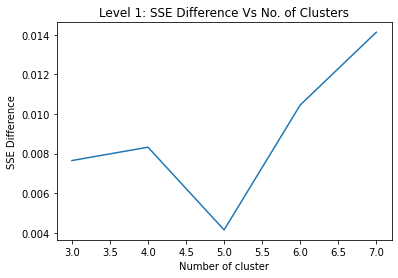

In [146]:
import subprocess

sse = {}
for ei, k in enumerate(range(2, 8)):
    bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "soft" "features_out/road_1000_l2_0.csv" {k} -s42 -r 1 -l 0.005 -a "cluster_out/l2_out.csv" -o "cluster_out/l2_logs.txt"'
    process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
    output, error = process.communicate(timeout=None)
    with open("cluster_out/l2_logs.txt", "r") as f:
        sse_value = f.readlines()[-1].split(",")[-2]
    sse[k] = sse_value 
    bashCommand = f'rm "cluster_out/l2_logs.txt"'
    process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )


sse_values = [float(i) for i in sse.values()]
sse_diff_values = np.absolute(np.array(sse_values[1:]) - np.array(sse_values[:-1])).tolist()
sse_diff_values =  sse_diff_values

plt.figure()
plt.title("Level 1: SSE Difference Vs No. of Clusters")
plt.plot(list(sse.keys())[1:], sse_diff_values)
plt.xlabel("Number of cluster")
plt.ylabel("SSE Difference")
plt.show()

#### Level 2.0 with Cluster : 

In [147]:
pd.read_csv("features_out/road_1000_l2_0.csv")

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.002484,0.002523,0.002455,0.002424,0.002392,0.002430,0.002357,0.002379,0.002400,0.002391,...,0.002542,0.002563,0.002625,0.002579,0.002518,0.002581,0.002595,0.002589,0.002561,0.002633
1,0.003147,0.003518,0.002086,0.003081,0.003697,0.003132,0.004548,0.004027,0.003972,0.004250,...,0.004008,0.003341,0.003443,0.004402,0.002659,0.002235,0.002848,0.003896,0.003319,0.003758
2,0.007599,0.007693,0.008003,0.007861,0.006102,0.007615,0.005633,0.007429,0.000977,-0.000964,...,0.001741,0.002780,0.003620,0.003493,0.004939,0.001637,0.005987,0.006135,0.008724,0.008344
3,0.003071,0.003111,0.003104,0.003121,0.003092,0.003111,0.003123,0.003102,0.003107,0.003098,...,0.003145,0.003124,0.003151,0.003167,0.003118,0.003136,0.003159,0.003159,0.003141,0.003170
4,0.002668,0.002690,0.002660,0.002754,0.002615,0.002748,0.002740,0.002628,0.002654,0.002626,...,0.002802,0.002736,0.002934,0.002748,0.002917,0.002755,0.002942,0.002883,0.002899,0.002873
5,0.001892,0.002611,0.002713,0.002927,0.002673,0.001926,0.001573,0.001695,0.002182,0.003188,...,0.003797,0.003832,0.004214,0.003178,0.003283,0.002870,0.002573,0.002578,0.002230,0.001531
6,0.003591,0.003244,0.003600,0.003157,0.002857,0.002348,0.002287,0.002573,0.002413,0.001615,...,0.002371,0.002567,0.002968,0.002943,0.003519,0.003787,0.003839,0.003813,0.003209,0.004208
7,0.003340,0.003165,0.002570,0.002568,0.002595,0.002830,0.002972,0.003052,0.002939,0.002660,...,0.002670,0.002552,0.002685,0.002324,0.002694,0.002937,0.002618,0.002837,0.003339,0.003700
8,0.002585,0.002533,0.002606,0.002570,0.002494,0.002533,0.002483,0.002516,0.002605,0.002580,...,0.002743,0.002741,0.002703,0.002695,0.002656,0.002661,0.002686,0.002700,0.002714,0.002706
9,0.002945,0.002945,0.002920,0.002929,0.002982,0.002987,0.002861,0.002832,0.002817,0.002850,...,0.002941,0.002931,0.002904,0.002984,0.002984,0.002968,0.002992,0.002915,0.003013,0.003101


In [148]:
bashCommand = f'/Users/pawnesh/ws/regularized-k-means/build/regularized-k-means "hard" "features_out/road_1000_l2_0.csv" 2 -s42 -r 1 -l 0.0005 -a "cluster_out/level2_0_out" -o "cluster_out/level2_0_logs.txt"'
process = subprocess.Popen(bashCommand, stdout=subprocess.PIPE, universal_newlines=True, shell=True )
output, error = process.communicate(timeout=None)

Sum of Squares: 4.94176e+06
Used Time: 6.212e-05


In [149]:
pd.read_csv("cluster_out/level2_0_out.csv")

,0
0,1
1,1
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,0


In [150]:
l2_0_label_df = pd.read_csv("cluster_out/level2_0_out.csv")
l2_0_label = l2_0_label_df.to_numpy().reshape(-1).tolist()
groups_w_name_l2_0 = defaultdict(list)
groups_w_id_l2_0 = defaultdict(list)
for class_id, label_id in zip(LEVEL2_0_INDX, l2_0_label):
    groups_w_name_l2_0[label_id].append(CLASSES[int(class_id)])
    groups_w_id_l2_0[label_id].append(int(class_id))
    

groups_w_name_l2[l2_head_key] = groups_w_name_l2_0

In [151]:
print(l2_0_label)

[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]


In [152]:
len(l2_0_label)

17

In [153]:
dd

NameError: name 'dd' is not defined

### level 2 _ 0 with 2 cluster

In [154]:
groups_w_name_l2[0]

defaultdict(list,
            {1: ['bicycle',
              'curb',
              'fence',
              'tunnel',
              'pole',
              'billboard',
              'manhole',
              'pickup_truck'],
             0: ['bus',
              'truck',
              'caravan',
              'pedestrian_area',
              'utility_pole',
              'junction_box',
              'phone_booth',
              'traffic_sign_frame',
              'animal']})

### level 2 _ 1 with 3 cluster

In [155]:
groups_w_name_l2[1]

defaultdict(list,
            {1: ['ego_vehicle',
              'boat',
              'other-vehicles',
              'service_lane',
              'snow',
              'barrier',
              'fire_hydrant',
              'pothole',
              'motorcyclist'],
             0: ['wheeled_slow',
              'rail_track',
              'crosswalk_plain',
              'water',
              'sand',
              'catch_basin',
              'other_rider']})

### level 2 _ 2 with 4 cluster

In [156]:
groups_w_name_l2[2]

defaultdict(list,
            {1: ['motorcycle',
              'parking',
              'traffic_sign',
              'traffic_light',
              'person',
              'bicyclist',
              'all_road_marking',
              'bird'],
             0: ['guard_rail',
              'street_light',
              'banner',
              'trash_can',
              'cctv_camera',
              'mailbox',
              'Van',
              'traffic_sign_back',
              'curb_cut']})

### level 2 _ 3 with 5 cluster

In [157]:
groups_w_name_l2[3]

defaultdict(list,
            {1: ['car',
              'train',
              'trailer',
              'sidewalk',
              'bike_lane',
              'zebra_marking',
              'building',
              'bench',
              'bike_rack'],
             0: ['road',
              'general_marking',
              'wall',
              'bridge',
              'vegetation',
              'terrain',
              'sky',
              'mountain']})